<a href="https://colab.research.google.com/github/LondheShubham153/exploratory_data_analysis/blob/main/50_startups_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import math

In [5]:
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
#checking for nulls
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

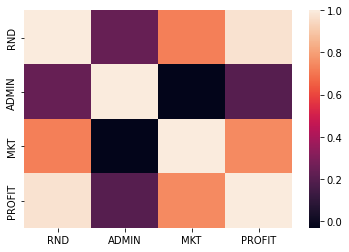

In [9]:
#Heatmap for correlation 
sns.heatmap(df.corr())

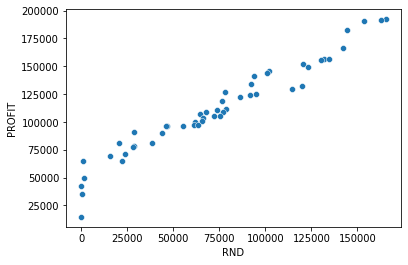

In [12]:
#correlation between R&D Spend and Profit.
sns.scatterplot(x="RND", y="PROFIT", data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffad712c310>,
      dtype=object)

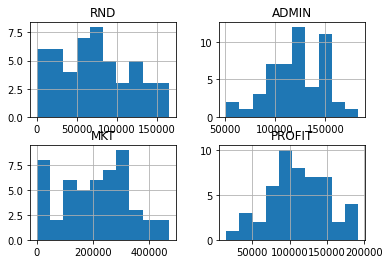

In [13]:
#Histogram to analyze the distribution of numerical variables
df.hist()

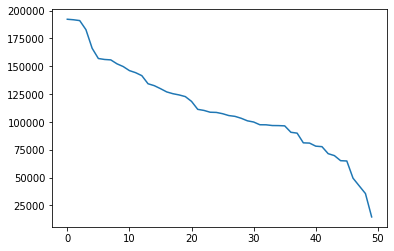

In [32]:
df["PROFIT"].plot(kind="line")

STATE
California    AxesSubplot(0.125,0.125;0.775x0.755)
Florida       AxesSubplot(0.125,0.125;0.775x0.755)
New York      AxesSubplot(0.125,0.125;0.775x0.755)
Name: PROFIT, dtype: object

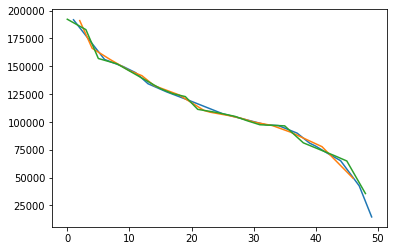

In [33]:
df.groupby("STATE")["PROFIT"].plot()

In [15]:
#Statistical Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RND,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
ADMIN,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
MKT,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
PROFIT,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [17]:
df["STATE"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [19]:
#categorical attribute inferences for State using get_dummies. They are nominals. It's not an ordinal.
df['STATE'] = pd.Categorical(df['STATE'])
dfDummies = pd.get_dummies(df['STATE'])
dfDummies

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [25]:
df = pd.concat([df, dfDummies], axis=1)
X = df.drop("PROFIT", axis = 1) #Features
y = df["PROFIT"] #Labels

In [26]:
X.head()

,RND,ADMIN,MKT,STATE,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,0,0,1
1,162597.70,151377.59,443898.53,California,1,0,0
2,153441.51,101145.55,407934.54,Florida,0,1,0
3,144372.41,118671.85,383199.62,New York,0,0,1
4,142107.34,91391.77,366168.42,Florida,0,1,0


In [27]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64